# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +28.18842991894                   -1.45    6.32s
  2   +20.13019195199        0.91       -0.86   10.9ms
  3   +13.78419899735        0.80       -0.42   10.7ms
  4   +13.27959400759       -0.30       -0.45   8.65ms
  5   +11.94530134998        0.13       -0.60   8.59ms
  6   +10.96863719497       -0.01       -0.71   8.60ms
  7   +9.865136499326        0.04       -0.75   8.64ms
  8   +9.039940338127       -0.08       -0.77   8.59ms
  9   +8.748857392877       -0.54       -0.88   8.60ms
 10   +8.674947501229       -1.13       -1.03   6.51ms
 11   +8.641076226935       -1.47       -1.02   6.63ms
 12   +8.537966525935       -0.99       -0.98   8.60ms
 13   +8.493825567826       -1.36       -1.05   6.59ms
 14   +8.454449795802       -1.40       -1.09   6.56ms
 15   +8.364231331481       -1.04       -1.05   6.51ms
 16   +8.239210660870       -0.90       -0.91   6.56ms
 17   +8.16

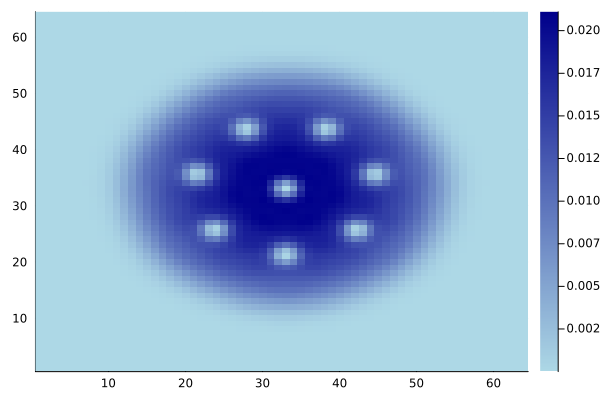

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)